In [634]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [635]:
ah = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory=False)
ar = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0,low_memory=False)

<h5><b>Drop Columns</b></h5>

In [636]:
ah = ah.drop(['LotFrontage'], axis=1).copy() # LotFrontage na: 462

<h5><b>Dummify Features</b></h5>

In [637]:
## fill na
ah['Alley'] = ah['Alley'].fillna(0)
ah['Fence'] = ah['Fence'].fillna(0)
ah['PoolQC'] = ah['PoolQC'].fillna(0)
ah['MiscFeature'] = ah['MiscFeature'].fillna(0)
ah['FireplaceQu'] = ah['FireplaceQu'].fillna(0)
## dummify
ah['Alley'] = ah['Alley'].map(lambda x: 0 if x == 0 else 1)
ah['Fence'] = ah['Fence'].map(lambda x: 0 if x == 0 else 1)
ah['Pool'] = ah['PoolArea'].map(lambda x: 1 if x >= 1 else 0)
ah['FireplaceQu'].replace({'Po':0, 'Fa':1,'TA':2, 'Gd':3,'Ex':4}, inplace=True)
ah['CentralAir'] = ah['CentralAir'].map(lambda x: 0 if x == 'N' else 1)
ah['Fire'] = ah['Fireplaces'].map(lambda x: 1 if x >= 1 else 0)

<h5><b>Group Features</b></h5>

In [638]:
myVars = ah[['Fireplaces','EnclosedPorch','3SsnPorch','ScreenPorch','Fire','Fence',
             'MiscFeature','MiscVal','MSSubClass','Pool','LotShape','LotConfig','Street',
             'Alley','Functional','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice']]

common_grp = ah[['GrLivArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea',
             'WoodDeckSF','OpenPorchSF','PoolArea','LotArea','BsmtFinSF1','BsmtFinSF2']]

categorical = ah[['Fireplaces','Fire','Fence','MiscFeature','MSSubClass','Pool','LotShape','LotConfig',
             'Alley','Functional','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice']]

numerical = ah[['EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','GrLivArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea',
             'WoodDeckSF','OpenPorchSF','PoolArea','LotArea','BsmtFinSF1','BsmtFinSF2','SalePrice']]

# normalized_numerical = ah[['EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','GrLivArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea',
#              'WoodDeckSF','OpenPorchSF','PoolArea','LotArea','BsmtFinSF1','BsmtFinSF2']]

categorical_a = ah[['Fireplaces','Fire','Fence','MiscFeature','MSSubClass','Pool','LotShape','LotConfig']]
categorical_b = ah[['Alley','Street','Functional','Utilities','Heating','HeatingQC','CentralAir','Electrical']]

In [639]:
myVars.info()
myVars.describe()
common_grp.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fireplaces     2580 non-null   int64 
 1   EnclosedPorch  2580 non-null   int64 
 2   3SsnPorch      2580 non-null   int64 
 3   ScreenPorch    2580 non-null   int64 
 4   Fire           2580 non-null   int64 
 5   Fence          2580 non-null   int64 
 6   MiscFeature    2580 non-null   object
 7   MiscVal        2580 non-null   int64 
 8   MSSubClass     2580 non-null   int64 
 9   Pool           2580 non-null   int64 
 10  LotShape       2580 non-null   object
 11  LotConfig      2580 non-null   object
 12  Street         2580 non-null   object
 13  Alley          2580 non-null   int64 
 14  Functional     2580 non-null   object
 15  Utilities      2580 non-null   object
 16  Heating        2580 non-null   object
 17  HeatingQC      2580 non-null   object
 18  CentralAir     2580 non-null 

,GrLivArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,LotArea,BsmtFinSF1,BsmtFinSF2
count,2580.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2579.000000,2579.000000
mean,1486.039922,539.101590,1036.686700,1144.975194,336.820155,4.244574,466.842575,95.919767,46.085271,1.662016,10120.153488,444.346258,53.238852
std,488.650181,425.199639,418.555417,375.958955,424.072452,44.403603,207.476842,129.052016,66.060664,30.339396,8126.937892,429.334957,174.423920
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000
25%,1112.000000,215.000000,792.000000,871.750000,0.000000,0.000000,318.000000,0.000000,0.000000,0.000000,7406.750000,0.000000,0.000000
50%,1436.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,474.000000,0.000000,25.500000,0.000000,9391.000000,384.000000,0.000000
75%,1733.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,576.000000,168.000000,68.000000,0.000000,11494.000000,732.000000,0.000000
max,4676.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,1488.000000,1424.000000,742.000000,800.000000,215245.000000,2288.000000,1526.000000


<h5><b>Catagorical Features EDA</b></h5>

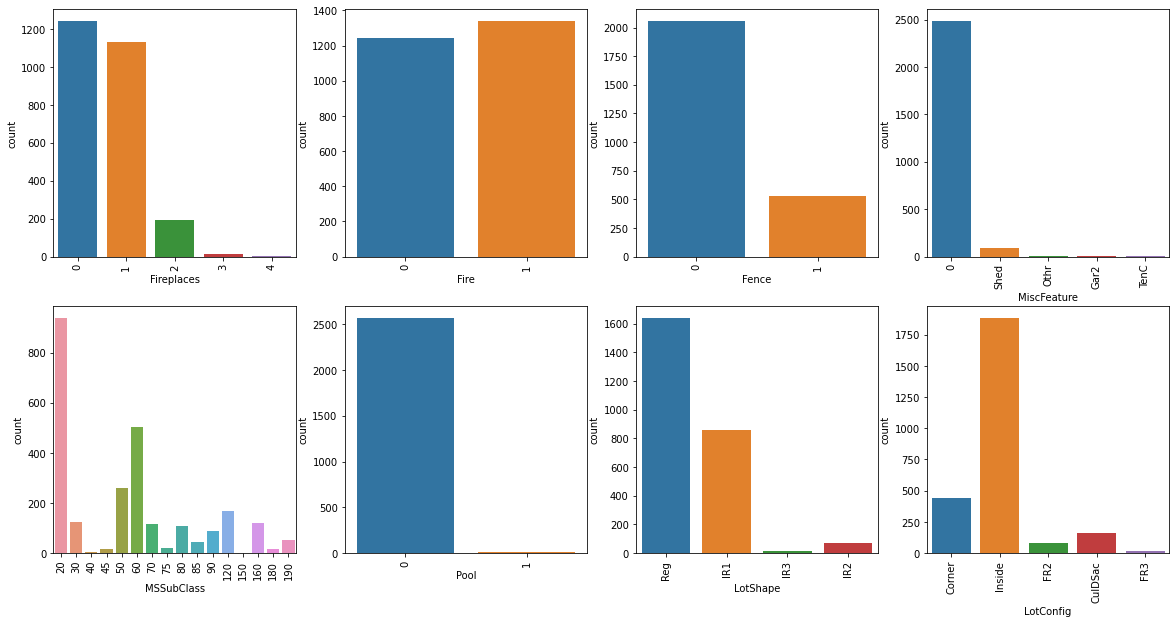

In [640]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_a, ax.flatten()):
    sns.countplot(x=myVars[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

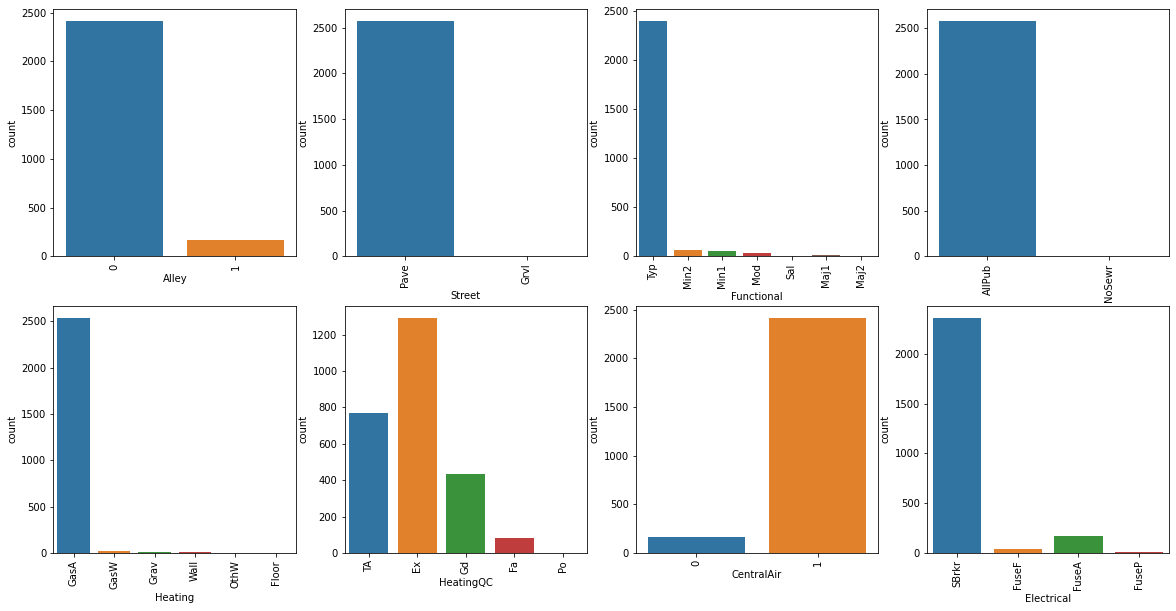

In [641]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_b, ax.flatten()):
    sns.countplot(x=myVars[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

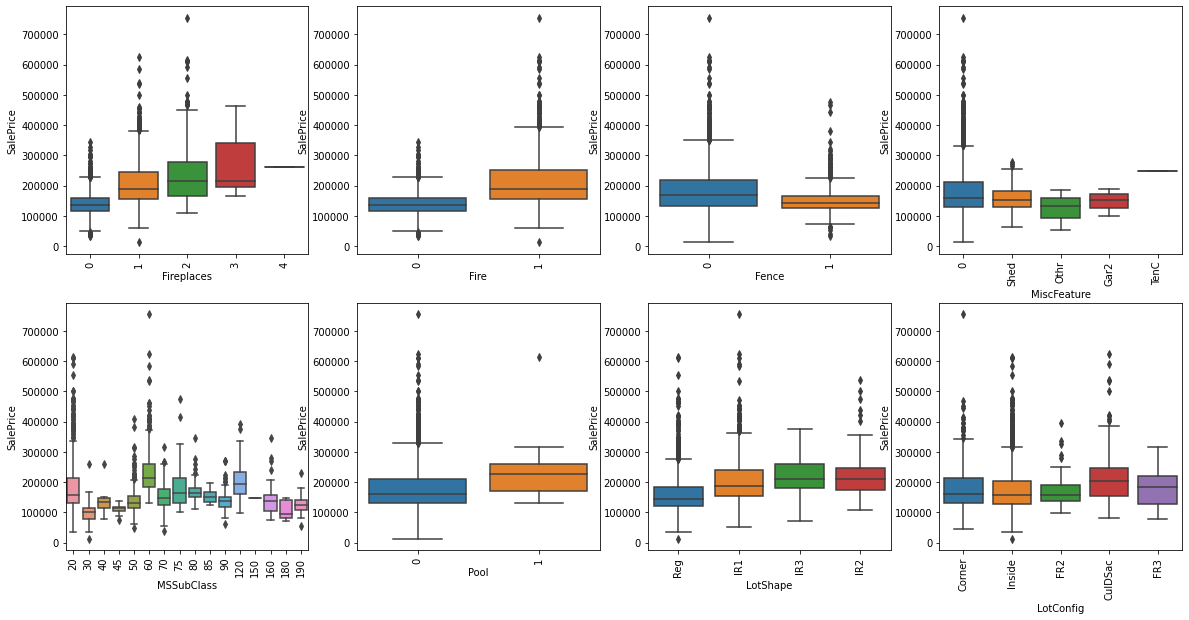

In [642]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_a, ax.flatten()):
    sns.boxplot(x=myVars[variable], y=salePrice,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

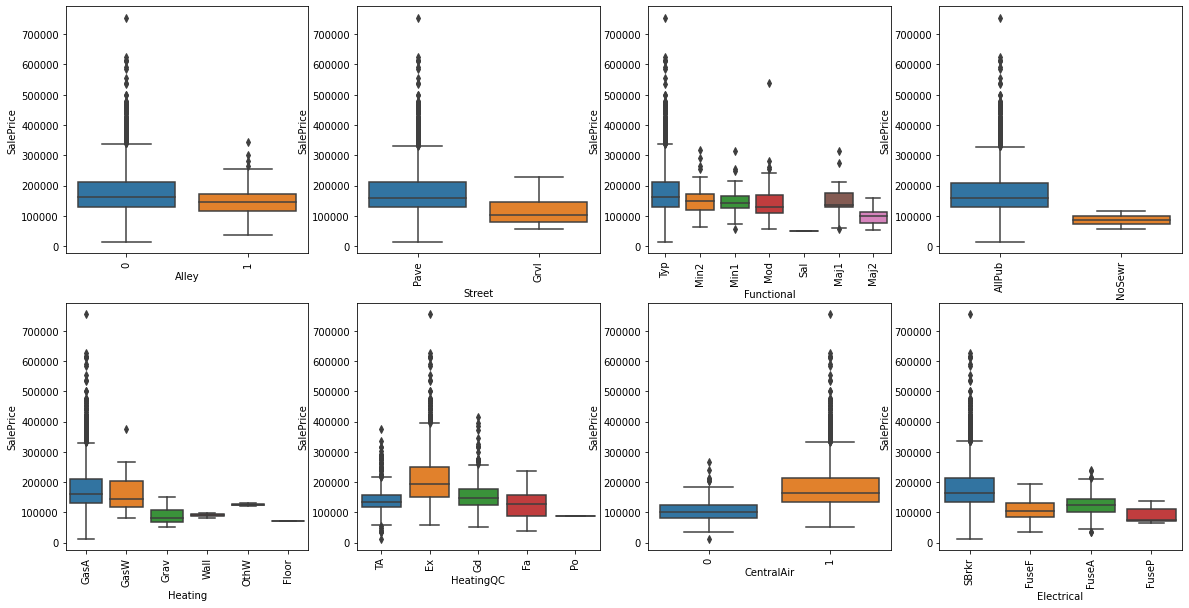

In [643]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_b, ax.flatten()):
    sns.boxplot(x=myVars[variable], y=salePrice,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

<h5><b>Numerical Features EDA</b></h5>

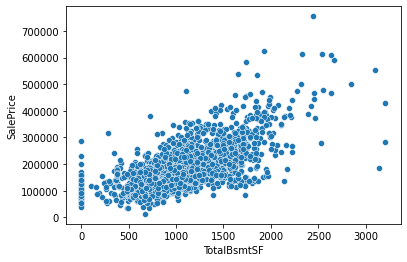

In [644]:
sns.scatterplot(x=ah['TotalBsmtSF'], y=ah['SalePrice']);

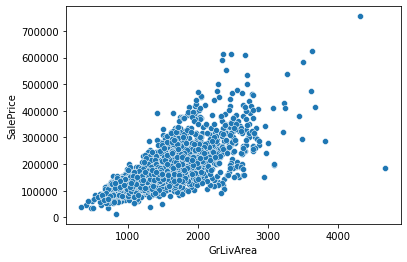

In [645]:
sns.scatterplot(x=ah['GrLivArea'], y=ah['SalePrice']);

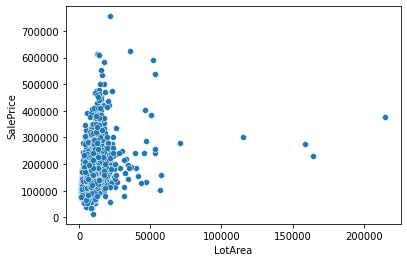

In [646]:
sns.scatterplot(x=ah['LotArea'], y=ah['SalePrice']);

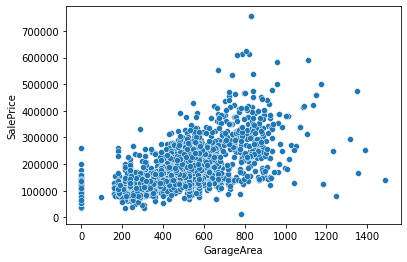

In [647]:
sns.scatterplot(x=ah['GarageArea'], y=ah['SalePrice']); 

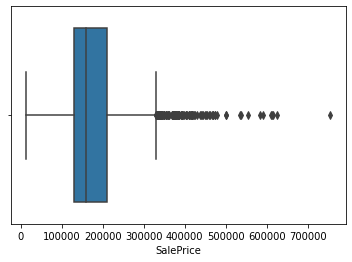

In [648]:
sns.boxplot(x=salePrice);

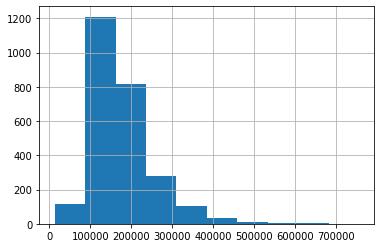

In [649]:
salePrice.hist();

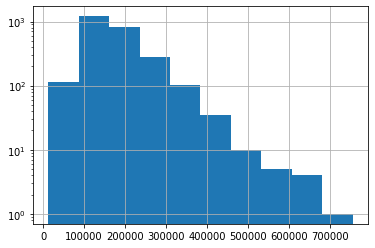

In [650]:
salePrice.hist(log=True);

<h1><b>Pre-Processing</b></h1>

<h2>Normalizing Numerical Features</h2>

In [651]:
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(numerical)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([  1012.,    508.,    576.,  15500.,   4676.,   2336.,   3206.,
       #   3820.,   1872.,   1064.,   1488.,   1424.,    742.,    800.,
       # 215245.,   2288.,   1526.])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(numerical)

# store scaled vals
scaled_numerical = pd.DataFrame(scaled_data, columns=numerical.columns)

In [652]:
scaled_numerical.dropna(inplace=True) # one na found in Electrical
SalePriceNumerical = scaled_numerical.SalePrice
scaled_numerical = scaled_numerical.drop(['SalePrice'], axis=1).copy()

<h2>Encoding Categorical Features</h2>

In [653]:
categorical.head(10)

,Fireplaces,Fire,Fence,MiscFeature,MSSubClass,Pool,LotShape,LotConfig,Alley,Functional,Utilities,Heating,HeatingQC,CentralAir,Electrical,SalePrice
1,1,1,0,0,30,0,Reg,Corner,0,Typ,AllPub,GasA,TA,1,SBrkr,126000
2,0,0,0,0,120,0,Reg,Inside,0,Typ,AllPub,GasA,TA,1,SBrkr,139500
3,0,0,0,0,30,0,Reg,Inside,0,Typ,AllPub,GasA,Ex,1,SBrkr,124900
4,0,0,0,0,70,0,Reg,Corner,0,Typ,AllPub,GasA,Gd,1,SBrkr,114000
5,0,0,0,0,60,0,Reg,Inside,0,Typ,AllPub,GasA,Ex,1,SBrkr,227000
6,1,1,0,0,85,0,Reg,Corner,0,Typ,AllPub,GasA,Ex,1,SBrkr,198500
7,0,0,0,0,20,0,Reg,Inside,1,Min2,AllPub,GasA,TA,0,SBrkr,93000
8,1,1,0,0,20,0,Reg,Inside,0,Typ,AllPub,GasA,Ex,1,SBrkr,187687
9,0,0,0,0,20,0,Reg,Corner,0,Typ,AllPub,GasA,TA,1,SBrkr,137500
10,0,0,0,0,180,0,Reg,Inside,0,Typ,AllPub,GasA,Ex,1,SBrkr,140000


In [654]:
# categorical.Heating.value_counts()
# GasA     2540 -> Gas forced warm air furnace -> 0
# GasW       25 -> Gas hot water or steam heat -> 1
# Grav        7 -> Gravity furnace -> 2
# Wall        5 -> Wall furnace -> 3
# OthW        2 -> Hot water or steam heat other than gas -> 4
# Floor       1 -> Floor Furnace -> 5
categorical['Heating'].replace({'GasA':0, 'GasW':1,'Grav':2, 'Wall':3,'OthW':4, 'Floor':5}, inplace=True)

# categorical.Electrical.value_counts()
# SBrkr    2365 -> Standard Circuit Breakers & Romex -> 0
# FuseA     168 -> Fuse Box over 60 AMP and all Romex wiring (Average) -> 1
# FuseF      39 -> 60 AMP Fuse Box and mostly Romex wiring (Fair) -> 2
# FuseP       7 -> 60 AMP Fuse Box and mostly knob & tube wiring (poor) -> 3
categorical['Electrical'].replace({'SBrkr':0, 'FuseA':1,'FuseF':2, 'FuseP':3}, inplace=True)

# categorical.HeatingQC.value_counts()
# Ex    1293 -> 0
# TA     768 -> 1
# Gd     434 -> 2
# Fa      84 -> 3
# Po       1 -> 4
categorical['HeatingQC'].replace({'Po':0, 'Fa':1,'TA':2, 'Gd':3,'Ex':4}, inplace=True)

# categorical.Utilities.value_counts()
# AllPub    2578 -> All public Utilities (E,G,W,& S) -> 0
# NoSewr       2 -> Electricity, Gas, and Water (Septic Tank) -> 1
categorical['Utilities'].replace({'AllPub':0, 'NoSewr':1}, inplace=True)

# categorical.Functional.value_counts()
# Typ     2399 -> Typical Functionality -> 0
# Min2      66 -> Minor Deductions 1 -> 1
# Min1      57 -> Minor Deductions 2 -> 2
# Mod       32 -> Moderate Deductions -> 3
# Maj1      18 -> Major Deductions 1 -> 4
# Maj2       7 -> Major Deductions 2 -> 5
# Sal        1 -> Salvage only -> 6
categorical['Functional'].replace({'Typ':0, 'Min1':1,'Min2':2, 'Mod':3,'Maj1':4, 'Maj2':5,'Sal':6}, inplace=True)

# categorical.LotConfig.value_counts()
# Inside     1886 -> Inside Lot -> 0
# Corner      439 -> Corner Lot -> 1
# CulDSac     164 -> Cul-de-sac -> 2
# FR2          78 -> Frontage on 2 sides of property -> 3
# FR3          13 -> Frontage on 3 sides of property -> 4
categorical['LotConfig'].replace({'Inside':0, 'Corner':1,'CulDSac':2, 'FR2':3,'FR3':4}, inplace=True)

## Criteria seems pretty subjective, may drop feature
# categorical.LotShape.value_counts()
# Reg    1641 -> Regular -> 0
# IR1     855 -> Slightly Irregular -> 1
# IR2      71 -> Moderately Irregular -> 2
# IR3      13 -> Irregular -> 3
categorical['LotShape'].replace({'Reg':0, 'IR1':1,'IR2':2, 'IR3':3}, inplace=True)

########### Dropping this feature for now, 'other' is not helpful
# categorical.MiscFeature.value_counts()
# 0       2483 -> 0
# Shed      88 -> Shed -> 1
# Gar2       5 -> 2nd garage -> 2
# Othr       3 -> other -> 3
# TenC       1 -> Tennis court -> 4
categorical = categorical.drop(['MiscFeature'], axis=1).copy()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [655]:
categorical.dropna(inplace=True) # one na found in Electrical
categorical['Electrical'] = categorical['Electrical'].astype(int)
# categorical.dtypes
categorical = categorical.drop(['SalePrice'], axis=1).copy()

<h2><b>Starting with Ridge Penalized Multilinear Regression</b></h2>

In [656]:
ridge = Ridge()

In [657]:
ridge.set_params(alpha = 1.0)
ridge.fit(categorical,SalePrice)
ridge.score(categorical,SalePrice)
# 0.44245071629005805 # not great!

0.44245071629005805

In [658]:
ridge.set_params(alpha = 1.0)
ridge.fit(scaled_numerical,SalePriceNumerical)
ridge.score(scaled_numerical,SalePriceNumerical)
# 0.7519160328243342 # ..better..

0.7519160328243342

<h3><b>Grid search</b></h3>
<h6><b>Using Manual grid search while getting aquainted with GridSearchSV</b></h6>

In [659]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha)  
          ridge.fit(scaled_numerical,SalePriceNumerical)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          R2.append(ridge.score(scaled_numerical, SalePriceNumerical)) # AttributeError: 'Ridge' object has no attribute 'R2_'

Text(0.5, 1.0, 'Change of Ridge Intercept Varying Alpha')

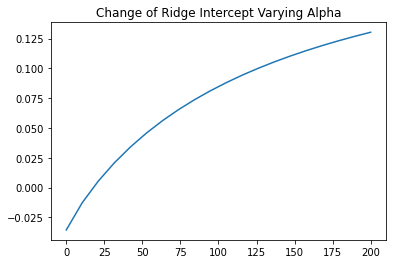

In [660]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')